In [9]:
%load_ext autoreload
%autoreload 2


from util import *
from myalgorithm import algorithm



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of myalgorithm failed: Traceback (most recent call last):
  File "c:\Users\user\Anaconda3\envs\ogc2024\lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\user\Anaconda3\envs\ogc2024\lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
  File "c:\Users\user\Anaconda3\envs\ogc2024\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "c:\Users\user\Desktop\github\main\Greedy_path_improved_working\myalgorithm.py", line 283
    '''
IndentationError: unexp

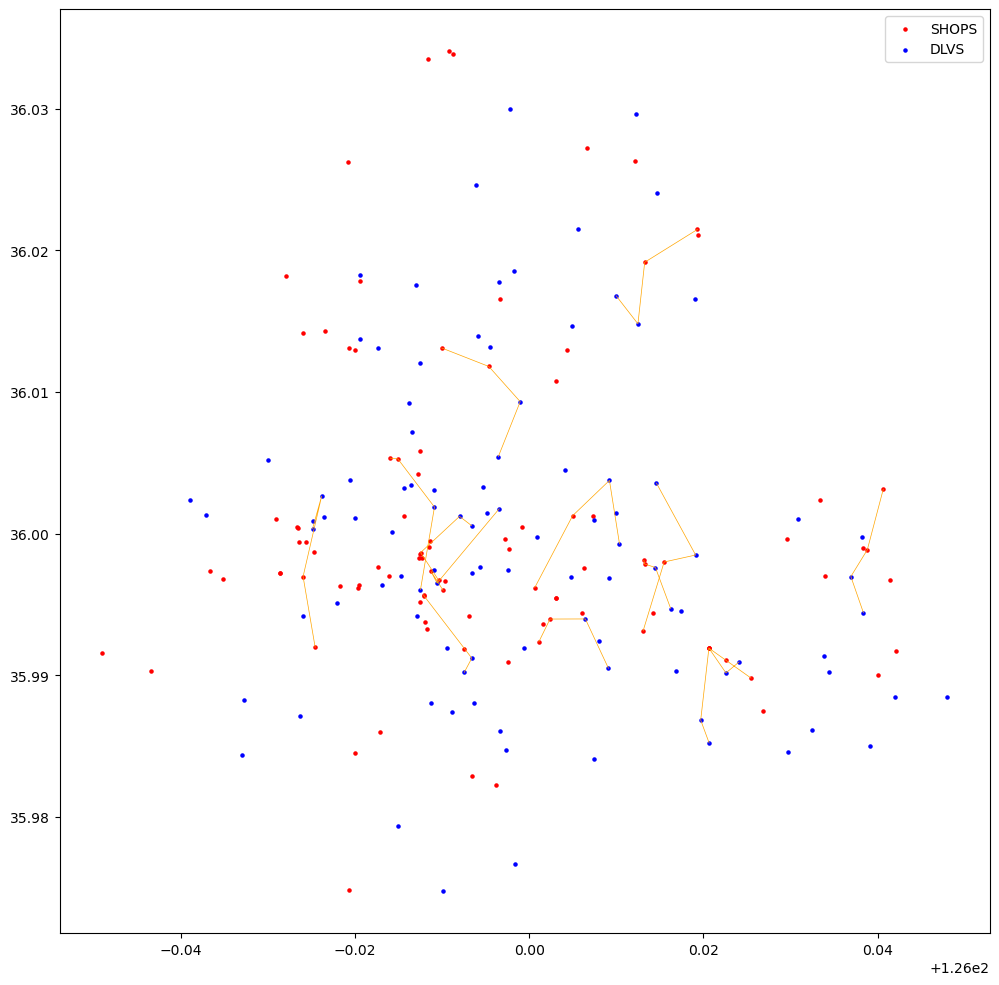

Initial best obj = 5272.004
[Bundle(all_orders, WALK, [23, 15], [23, 15], 40, True), Bundle(all_orders, WALK, [77, 80], [77, 80], 43, True), Bundle(all_orders, WALK, [46, 62], [46, 62], 24, True), Bundle(all_orders, WALK, [61, 68], [61, 68], 39, True), Bundle(all_orders, WALK, [89, 76], [89, 76], 44, True), Bundle(all_orders, WALK, [28, 35], [28, 35], 39, True), Bundle(all_orders, WALK, [52, 66], [52, 66], 36, True), Bundle(all_orders, WALK, [86, 93], [93, 86], 38, True), Bundle(all_orders, WALK, [73, 90], [73, 90], 26, True), Bundle(all_orders, WALK, [74, 98], [74, 98], 47, True), Bundle(all_orders, WALK, [56, 70], [56, 70], 33, True), Bundle(all_orders, WALK, [43, 31], [43, 31], 49, True), Bundle(all_orders, WALK, [53, 58], [58, 53], 36, True), Bundle(all_orders, WALK, [17, 39], [17, 39], 31, True), Bundle(all_orders, CAR, [0], [0], 21, True), Bundle(all_orders, CAR, [1, 41], [1, 41], 33, True), Bundle(all_orders, CAR, [2], [2], 22, True), Bundle(all_orders, CAR, [3], [3], 44, True),

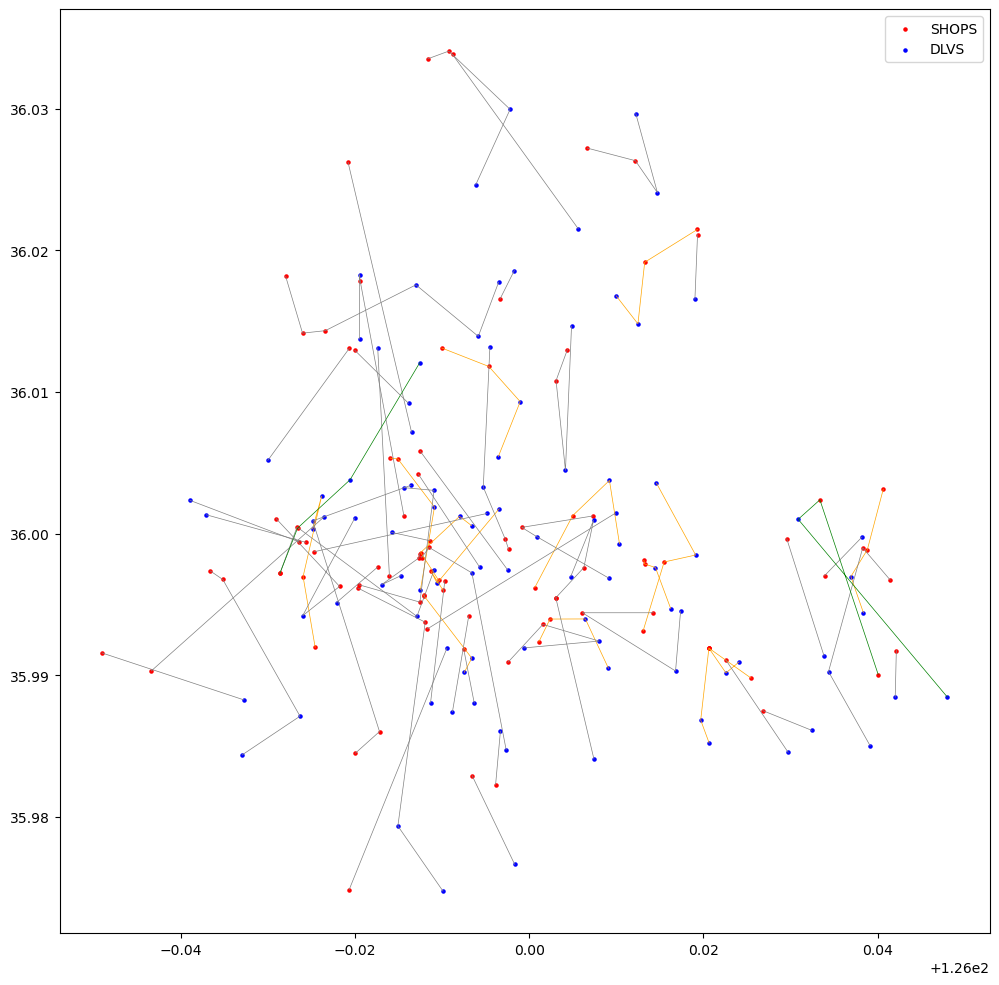

Elapsed time for initializing: 1.504399061203003
single order bundle
WALK: 총 8개
  길이 2: 8개
BIKE: 총 15개
  길이 2: 4개
  길이 3: 9개
  길이 4: 2개
CAR: 총 19개
  길이 1: 2개
  길이 2: 13개
  길이 3: 3개
  길이 4: 1개
[Bundle(all_orders, WALK, [61, 68], [61, 68], 39, True), Bundle(all_orders, WALK, [28, 35], [28, 35], 39, True), Bundle(all_orders, WALK, [52, 66], [52, 66], 36, True), Bundle(all_orders, WALK, [86, 93], [93, 86], 38, True), Bundle(all_orders, WALK, [73, 90], [73, 90], 26, True), Bundle(all_orders, WALK, [74, 98], [74, 98], 47, True), Bundle(all_orders, WALK, [56, 70], [56, 70], 33, True), Bundle(all_orders, WALK, [43, 31], [43, 31], 49, True), Bundle(all_orders, CAR, [1, 41], [1, 41], 33, True), Bundle(all_orders, CAR, [3], [3], 44, True), Bundle(all_orders, CAR, [4, 13, 9], [4, 9, 13], 41, True), Bundle(all_orders, CAR, [10, 32], [10, 32], 39, True), Bundle(all_orders, CAR, [29, 54], [29, 54], 66, True), Bundle(all_orders, CAR, [48, 64], [48, 64], 35, True), Bundle(all_orders, CAR, [65, 60], [60

{'total_cost': 403123.5,
 'avg_cost': 4031.235,
 'num_drivers': 42,
 'total_dist': 148415,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['WALK', [61, 68], [61, 68]],
  ['WALK', [28, 35], [28, 35]],
  ['WALK', [52, 66], [52, 66]],
  ['WALK', [86, 93], [93, 86]],
  ['WALK', [73, 90], [73, 90]],
  ['WALK', [74, 98], [74, 98]],
  ['WALK', [56, 70], [56, 70]],
  ['WALK', [43, 31], [43, 31]],
  ['CAR', [1, 41], [1, 41]],
  ['CAR', [3], [3]],
  ['CAR', [4, 13, 9], [4, 9, 13]],
  ['CAR', [10, 32], [10, 32]],
  ['CAR', [29, 54], [29, 54]],
  ['CAR', [48, 64], [48, 64]],
  ['CAR', [65, 60], [60, 65]],
  ['CAR', [69, 83], [69, 83]],
  ['BIKE', [97, 71], [71, 97]],
  ['CAR', [72, 88], [72, 88]],
  ['CAR', [78, 84], [78, 84]],
  ['CAR', [79, 85], [79, 85]],
  ['CAR', [81, 92], [81, 92]],
  ['CAR', [91, 99], [99, 91]],
  ['CAR', [96], [96]],
  ['BIKE', [5, 46, 62], [5, 46, 62]],
  ['BIKE', [37, 42], [37, 42]],
  ['CAR', [51, 44, 36], [51, 44, 36]],
  ['BIKE', [19, 33, 22, 16], [22, 19, 33

In [53]:
problem_file = r'C:\Users\user\Desktop\github\main\stage1_problems\STAGE1_1.json'
timelimit = 60

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

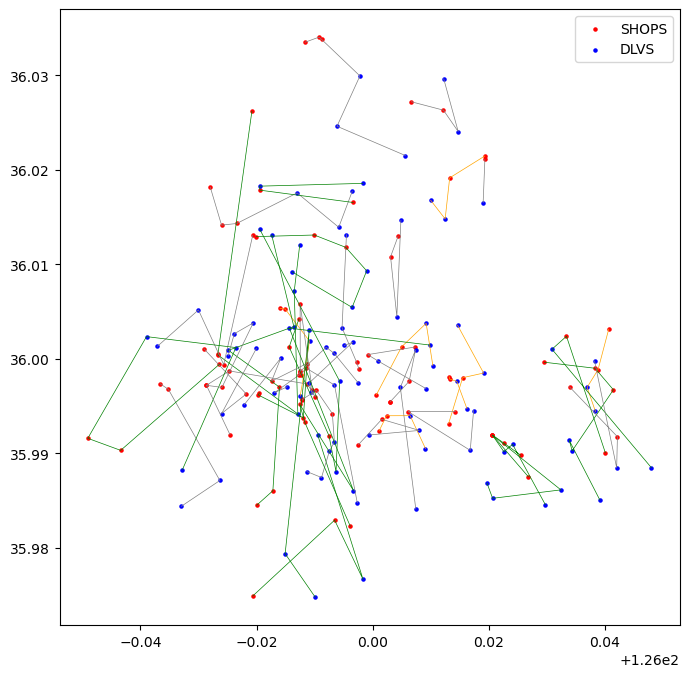

In [47]:
draw_route_solution(ALL_ORDERS, checked_solution)

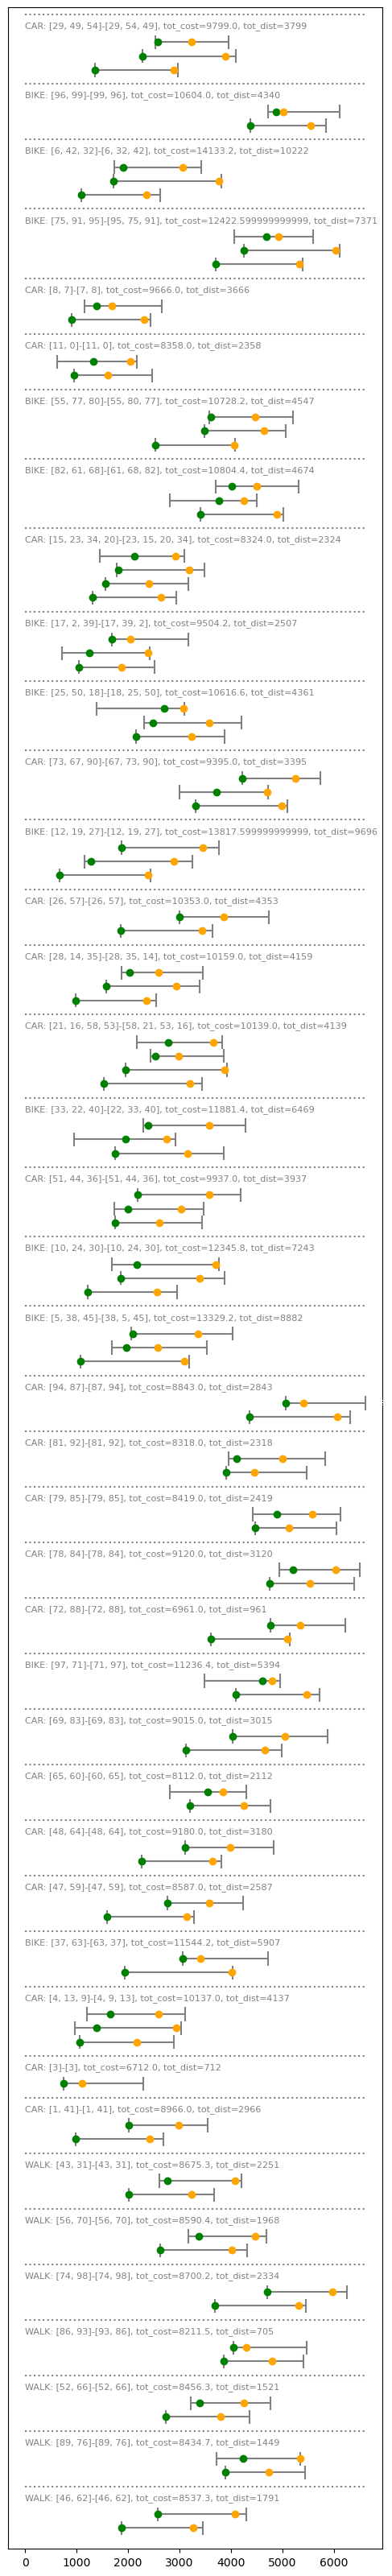

In [48]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)